In [760]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [761]:
titanic = pd.read_csv("titanic-passengers.csv", delimiter=";")

In [762]:
titanic.shape

(891, 12)

In [763]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [764]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [765]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [766]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.at[396, "Embarked"] = "C"
titanic.at[399, "Embarked"] = "S"

In [767]:
titanic.isnull().sum().sum()

687

In [768]:
titanic = titanic.join(pd.Series(titanic.SibSp+titanic.Parch + 1, name="Family_Size"), how="left")
titanic["Title"] = titanic.Name.map(lambda x: x.split(",")[1].strip().split(" ")[0].strip()[:-1])

In [769]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,1,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,1,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,1,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,5,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,2,Mr


## Converting categorical features to numerical

In [770]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEnc = LabelEncoder()
titanic["Title"] = labelEnc.fit_transform(titanic.Title.values)

In [771]:
titanic.replace({"Sex": {"male": 1, "female": 0}, "Survived": {"Yes": 1, "No": 0}, "Embarked": {'S': 1, 'C': 2, 'Q': 3}}, inplace=True)
# titanic.replace({"Sex": {"male": 1, "female": 0}, "Survived": {"Yes": 1, "No": 0}}, inplace=True) # This is for One-hot-encoding the Embarked column.
# titanic = pd.get_dummies(titanic, columns=["Embarked"])   # One-hot-encoding Embarked feature

Dropping unneeded columns

In [772]:
titanic.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)

In [773]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,2,1,28.0,0,0,13.0000,1,1,11
1,0,3,1,25.0,0,0,7.6500,1,1,11
2,0,3,1,20.0,0,0,7.8542,1,1,11
3,0,3,0,29.0,0,4,21.0750,1,5,12
4,0,1,1,31.0,1,0,52.0000,1,2,11


## Building the model

In [774]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = titanic.drop(["Survived"], axis=1)
y = titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 30%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print("f1 Score={:.2f}".format(metrics.f1_score(y_test, y_pred, average="binary")))

Accuracy=0.84
f1 Score=0.77


C:\Users\pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


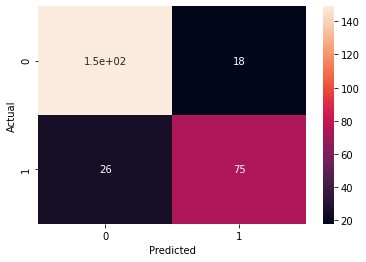

In [775]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

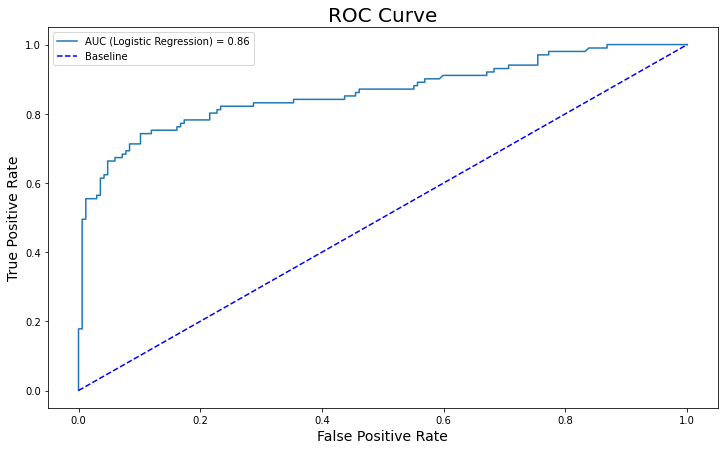

In [776]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_lr = logreg.predict_proba(x_test)[:, 1]

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

plt.figure(figsize=(12, 7))

plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

**Interpretation:**
The model is making *86* correct preditions out of a *100*, that's very good as a start

In [785]:
# Trying different features combinations

columns = titanic.columns.to_list()
columns.remove("Survived")
features = []
for i, col in enumerate(columns):
    features.append(col)
    print(features, sep=" ")
    x = titanic[features]
    y = titanic['Survived']

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 30%

    logreg = LogisticRegression(max_iter=500) 
    logreg.fit(x_train, y_train)
    y_pred  = logreg.predict(x_test)  
    print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
    print("f1 Score={:.2f}".format(metrics.f1_score(y_test, y_pred, average="binary")))


['Pclass']
Accuracy=0.63
f1 Score=0.40
['Pclass', 'Sex']
Accuracy=0.83
f1 Score=0.76
['Pclass', 'Sex', 'Age']
Accuracy=0.81
f1 Score=0.73
['Pclass', 'Sex', 'Age', 'SibSp']
Accuracy=0.84
f1 Score=0.79
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
Accuracy=0.83
f1 Score=0.77
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Accuracy=0.83
f1 Score=0.77
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Accuracy=0.82
f1 Score=0.75
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size']
Accuracy=0.82
f1 Score=0.75
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Title']
Accuracy=0.82
f1 Score=0.74


In [786]:
# Final test
x = titanic[["Pclass", "Sex", "Age", "SibSp"]]
y = titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 30%

logreg = LogisticRegression(max_iter=500)   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print("f1 Score={:.2f}".format(metrics.f1_score(y_test, y_pred, average="binary")))

Accuracy=0.84
f1 Score=0.79


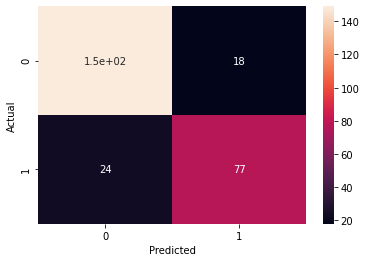

In [779]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

The features combination *Pclass, Sex, Age, SibSp* yields the best results for our given dataset when using <u>Logistic Regression.</u>

Let's calculate the necessary metrics for this model and analyse the results.

In [780]:
TP, TN, FP, FN = confusion_matrix.loc[1][1], confusion_matrix.loc[0][0], confusion_matrix.loc[0][1], confusion_matrix.loc[1][0]
recall = TP/(TP + FN)
precision = TP/(TP + FP)
print("Recall = %.2f\nPrecision: %.2f" % (recall, precision))
print(f"f1 score: {metrics.fbeta_score(y_test, y_pred, beta=2):.2f}")
print(f"f2 score: {metrics.fbeta_score(y_test, y_pred, beta=1):.2f}")

Recall = 0.76
Precision: 0.81
f1 score: 0.77
f2 score: 0.79


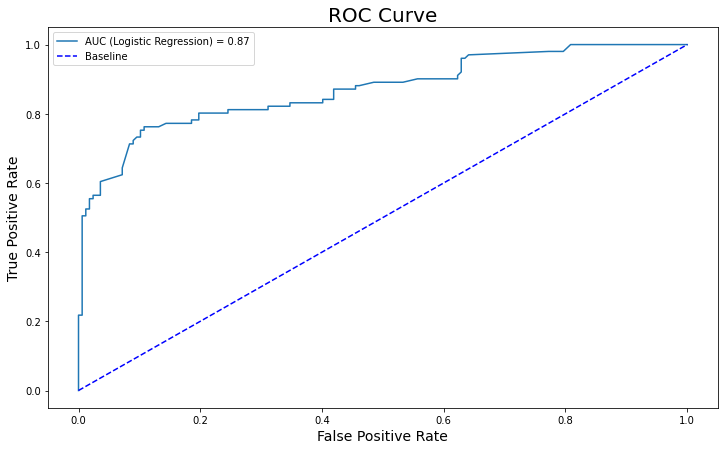

In [781]:
probs_lr = logreg.predict_proba(x_test)[:, 1]

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

plt.figure(figsize=(12, 7))

plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

From the <u>ROC Curve</u> graph, we notice that our model has AUC value euqal to **0.87**. This means that the model has an **87%** chance of distinguishing between positive and negative classes, or in other words, out of 100 titanic passengers, it can make 87 correct predictions on whether or not a passenger dieded during the crash.